In [1]:
import scipy.stats
import pandas as pd
from numpy import std, mean
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Fetch Phishing Dataset.
phishing_websites = fetch_ucirepo(id=327)
X = phishing_websites.data.features 
Y = phishing_websites.data.targets

In [3]:
correlation_dataset  = []
for feature in X.columns:
    data = {}
    data["feature_name"] = feature
    data["pearson_corr"] = scipy.stats.pearsonr(X[f"{feature}"], Y["result"]).correlation,
    data["pearson_p"] = scipy.stats.pearsonr(X[f"{feature}"], Y["result"]).pvalue,
    data["kendalltau_corr"] = scipy.stats.kendalltau(X[f"{feature}"], Y["result"]).correlation,
    data["kendalltau_p"] = scipy.stats.kendalltau(X[f"{feature}"], Y["result"]).pvalue,
    data["spearman_corr"] = scipy.stats.spearmanr(X[f"{feature}"], Y["result"]).correlation,
    data["spearman_p"] = scipy.stats.spearmanr(X[f"{feature}"], Y["result"]).pvalue,
    correlation_dataset.append(data)

pd.DataFrame(correlation_dataset)

,feature_name,pearson_corr,pearson_p,kendalltau_corr,kendalltau_p,spearman_corr,spearman_p
0,having_ip_address,"(0.09416009495620384,)","(3.367488217885044e-23,)","(0.09416009495620382,)","(4.1708960706604755e-23,)","(0.09416009495620384,)","(3.3674882178849097e-23,)"
1,url_length,"(0.05742962926610769,)","(1.516369850371678e-09,)","(0.05303031295961927,)","(2.0565469594860194e-08,)","(0.05333157943393258,)","(2.0140695146113154e-08,)"
2,shortining_service,"(-0.06796589265932151,)","(8.453980421665624e-13,)","(-0.06796589265932151,)","(8.947433951728219e-13,)","(-0.06796589265932153,)","(8.453980421666224e-13,)"
3,having_at_symbol,"(0.05294778935893241,)","(2.5422152631988484e-08,)","(0.05294778935893241,)","(2.5942281623564336e-08,)","(0.052947789358932414,)","(2.5422152631990105e-08,)"
4,double_slash_redirecting,"(-0.038607611955948105,)","(4.899593894145576e-05,)","(-0.038607611955948126,)","(4.9256460976629e-05,)","(-0.038607611955948126,)","(4.8995938941457226e-05,)"
5,prefix_suffix,"(0.34860557031815553,)","(2.26899384446e-313,)","(0.3486055703181555,)","(4.300302709386947e-294,)","(0.34860557031815537,)","(0.0,)"
6,having_sub_domain,"(0.2983233237700883,)","(4.9184505188065466e-226,)","(0.2873769200140248,)","(3.581829194783544e-225,)","(0.3046922676521399,)","(3.490711613541645e-236,)"
7,sslfinal_state,"(0.7147411951750123,)","(0.0,)","(0.7096704993780814,)","(0.0,)","(0.735813975062039,)","(0.0,)"
8,domain_registration_length,"(-0.22578946245860998,)","(8.626486457682405e-128,)","(-0.2257894624586099,)","(1.4255257766322923e-124,)","(-0.2257894624586099,)","(8.626486457681804e-128,)"
9,favicon,"(-0.000279524694945258,)","(0.9765561998781418,)","(-0.0002795246949452248,)","(0.9765546100116309,)","(-0.0002795246949452248,)","(0.9765561998781388,)"


In [4]:
# Divide the dataset.
X_train, X_test = train_test_split(X, test_size=0.2, random_state=0)
Y_train, Y_test = train_test_split(Y, test_size=0.2, random_state=0)

# Multivariate Logistic Regression

Accuracy: 0.92
Classification Report:               precision    recall  f1-score   support

          -1       0.92      0.89      0.91      1014
           1       0.91      0.94      0.92      1197

    accuracy                           0.92      2211
   macro avg       0.92      0.91      0.92      2211
weighted avg       0.92      0.92      0.92      2211



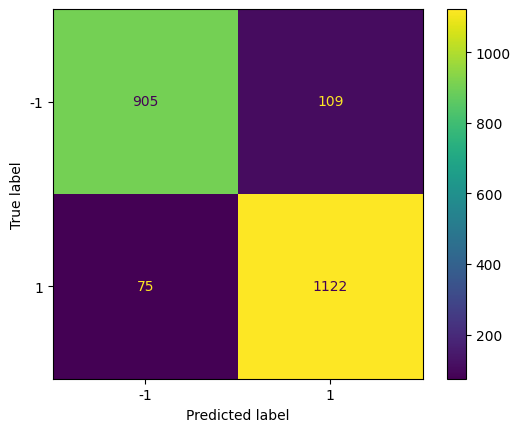

In [5]:
# Setup a model and a cross validator.
logreg_model = LogisticRegression(multi_class="multinomial", solver="lbfgs", penalty=None)

# Test the model before
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(logreg_model, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# print(f"{mean(n_scores)} mean, {std(n_scores)} std")

# Fit the model and test it generate a confusion matrix.
logreg_model.fit(X_train, Y_train)
Y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred_logreg)
classification_rep = classification_report(Y_test, Y_pred_logreg)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Classification Report: {classification_rep}")

CM = confusion_matrix(Y_test, Y_pred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=logreg_model.classes_)
disp.plot()

In [6]:
accuracy = (CM[0][0] + CM[1][1]) / (CM[0][0] + CM[0][1] + CM[1][0] + CM[1][1])
recall = CM[1][1] / (CM[1][1] + CM[1][0])
precision = CM[1][1] / (CM[1][1] + CM[0][1])
F1 = 2* ((precision* recall) / (precision+recall))
{"accuracy": accuracy, "precision": precision, "recall": recall, "f1_score": F1}

{'accuracy': 0.9167797376752601,
 'precision': 0.9114541023558083,
 'recall': 0.9373433583959899,
 'f1_score': 0.9242174629324545}

# Random Forest Classifier

Accuracy: 0.97
Classification Report:               precision    recall  f1-score   support

          -1       0.98      0.95      0.97      1014
           1       0.96      0.99      0.97      1197

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



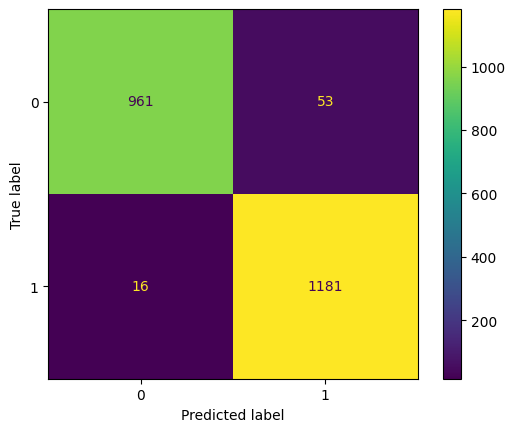

In [7]:
# Setup a model and a cross validator.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model and test it generate a confusion matrix.
rf_model.fit(X_train, Y_train)
Y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Classification Report: {classification_rep}")

CM = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=CM)
disp.plot()

In [8]:
X.columns

Index(['having_ip_address', 'url_length', 'shortining_service',
       'having_at_symbol', 'double_slash_redirecting', 'prefix_suffix',
       'having_sub_domain', 'sslfinal_state', 'domain_registration_length',
       'favicon', 'port', 'https_token', 'request_url', 'url_of_anchor',
       'links_in_tags', 'sfh', 'submitting_to_email', 'abnormal_url',
       'redirect', 'on_mouseover', 'rightclick', 'popupwindow', 'iframe',
       'age_of_domain', 'dnsrecord', 'web_traffic', 'page_rank',
       'google_index', 'links_pointing_to_page', 'statistical_report'],
      dtype='object')

# AdaBoost Classifier

Accuracy: 0.93
Classification Report:               precision    recall  f1-score   support

          -1       0.94      0.92      0.93      1014
           1       0.93      0.95      0.94      1197

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



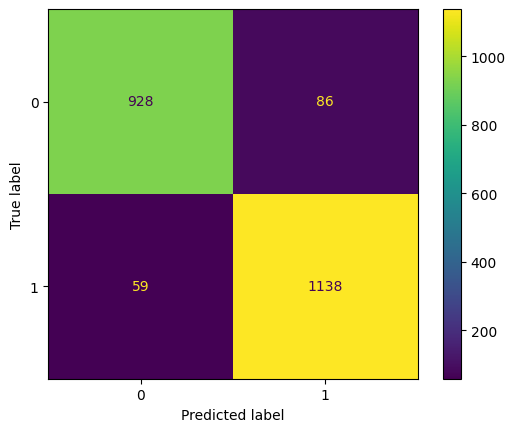

In [9]:
# Setup a model and a cross validator.
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Fit the model and test it generate a confusion matrix.
adaboost_model.fit(X_train, Y_train)
Y_pred_ada = adaboost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred_ada)
classification_rep = classification_report(Y_test, Y_pred_ada)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Classification Report: {classification_rep}")

CM = confusion_matrix(Y_test, Y_pred_ada)
disp = ConfusionMatrixDisplay(confusion_matrix=CM)
disp.plot()